### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [35]:
import pandas as pd

df = pd.read_csv('C:/Users/hp/uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [36]:
# Convert the 'Date/Time' column to datetime format


# Group by date and count the number of pickups


# Find the date with the highest number of pickups




In [37]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])


In [38]:
df1=df.copy()
df1.set_index('Date/Time', inplace=True)

# Group by date and count the number of pickups
pickup_counts_by_date = df1.resample('D').size().reset_index(name='Pickups')

# Find the date with the highest number of pickups
date_with_highest_pickups = pickup_counts_by_date.loc[pickup_counts_by_date['Pickups'].idxmax(), 'Date/Time']

print(date_with_highest_pickups)

2014-08-07 00:00:00


In [39]:
pickup_counts_by_date

,Date/Time,Pickups
0,2014-08-01,32353
1,2014-08-02,28678
2,2014-08-03,23146
3,2014-08-04,24952
4,2014-08-05,28094
5,2014-08-06,30495
6,2014-08-07,32759
7,2014-08-08,30411
8,2014-08-09,26286
9,2014-08-10,20584


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [40]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups


# Get the count of pickups on the highest date


# Filter the DataFrame to include only the rows for the date with the highest number of pickups
highest_pickups_date_df = df[df['Date/Time'].dt.date == date_with_highest_pickups.date()]

# Get the count of pickups on the highest date
count_of_pickups_on_highest_date = highest_pickups_date_df.shape[0]


print("Count of pickups on the highest date:", count_of_pickups_on_highest_date)

Count of pickups on the highest date: 32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [49]:
# Count the number of unique TLC base companies
num_unique_base_companies = df['Base'].nunique()

print("Number of unique TLC base companies:", num_unique_base_companies)



Number of unique TLC base companies: 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [42]:
# Group by TLC base company and count the number of pickups


# Find the TLC base company with the highest number of pickups

pickup_counts_by_base_company = df.groupby('Base').size().reset_index(name='Pickups')

# Find the TLC base company with the highest number of pickups
base_company_with_highest_pickups = pickup_counts_by_base_company.loc[pickup_counts_by_base_company['Pickups'].idxmax(), 'Base']


print("TLC base company with the highest number of pickups:", base_company_with_highest_pickups)

TLC base company with the highest number of pickups: B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [43]:
# Group by TLC base company and count the number of pickups

pickup_counts_by_base_company = df.groupby('Base').size().reset_index(name='Pickups')

print(pickup_counts_by_base_company)


     Base  Pickups
0  B02512    31472
1  B02598   220129
2  B02617   355803
3  B02682   173280
4  B02764    48591


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [44]:
# Extract the hour from the 'Date/Time' column


# Group by hour and count the number of pickups


# Find the hour with the highest number of pickups



# Extract the hour from the 'Date/Time' column
df['Hour'] = df['Date/Time'].dt.hour

# Group by hour and count the number of pickups for each hour
pickup_counts_by_hour = df.groupby('Hour').size().reset_index(name='Pickups')

# Find the hour with the highest number of pickups
hour_with_highest_pickups = pickup_counts_by_hour.loc[pickup_counts_by_hour['Pickups'].idxmax(), 'Hour']

print(pickup_counts_by_hour)
print("Hour with the highest number of pickups:", hour_with_highest_pickups)

    Hour  Pickups
0      0    21451
1      1    14471
2      2    10105
3      3    10376
4      4    11774
5      5    16525
6      6    24907
7      7    34064
8      8    34566
9      9    30195
10    10    30706
11    11    31778
12    12    32106
13    13    35764
14    14    40644
15    15    48197
16    16    53481
17    17    57122
18    18    55390
19    19    53008
20    20    51674
21    21    51354
22    22    46008
23    23    33609
Hour with the highest number of pickups: 17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function

<AxesSubplot:title={'center':'number of pickups over time'}, xlabel='Date/Time'>

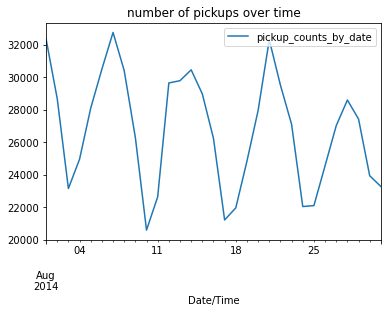

In [54]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups


# Create a line plot to visualize the number of pickups over time

pickup_counts_by_date = df.resample('D', on='Date/Time').size().reset_index(name='pickup_counts_by_date')

#print(pickup_counts_by_date)

# Draw the line plot
pickup_counts_by_date.plot(x='Date/Time', y='pickup_counts_by_date', kind='line', title='number of pickups over time')








#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

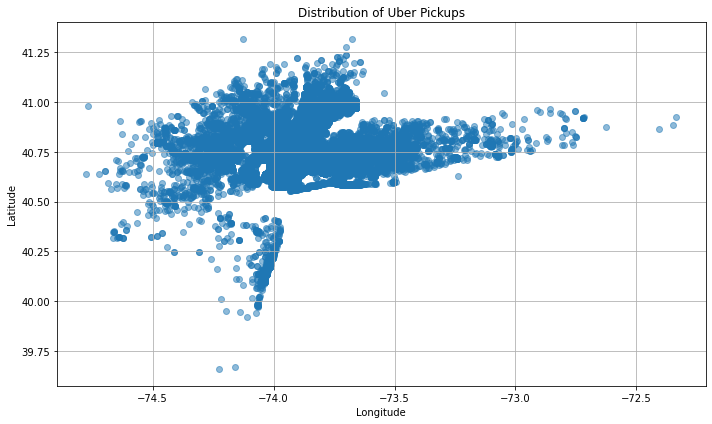

In [55]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude

plt.figure(figsize=(10, 6))
plt.scatter(df['Lon'], df['Lat'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Uber Pickups')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

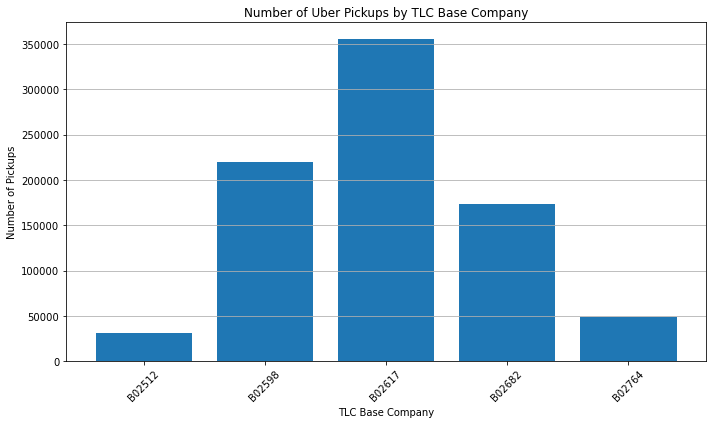

In [56]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
plt.figure(figsize=(10, 6))
plt.bar(pickup_counts_by_base_company['Base'], pickup_counts_by_base_company['Pickups'])
plt.xlabel('TLC Base Company')
plt.ylabel('Number of Pickups')
plt.title('Number of Uber Pickups by TLC Base Company')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

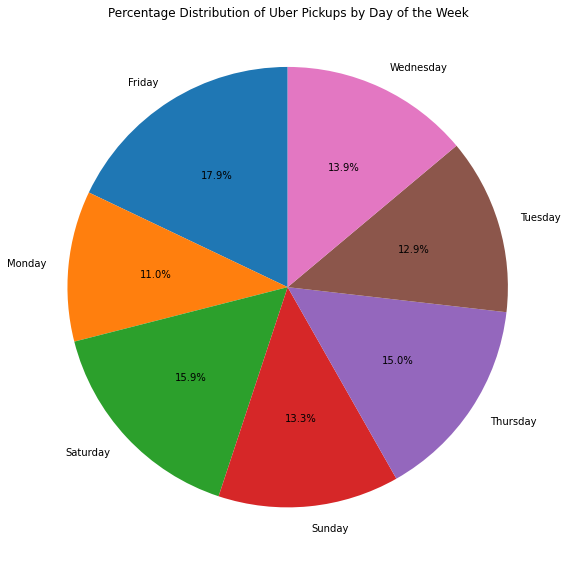

In [57]:
# Group by day of the week and count the number of pickups


# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week


df['Day_of_Week'] = df['Date/Time'].dt.day_name()
pickup_counts_by_day_of_week = df.groupby('Day_of_Week').size()

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.figure(figsize=(8, 8))
plt.pie(pickup_counts_by_day_of_week, labels=pickup_counts_by_day_of_week.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Uber Pickups by Day of the Week')
plt.axis('equal')
plt.tight_layout()
plt.show()